# INFSCI 510: Data Analysis Final Project


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

%matplotlib inline

df = pd.read_csv("transaction_dataset.csv")
df.columns

Index(['Unnamed: 0', 'Index', 'Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 

In [2]:
def xvarnames(n,x=1):
    return ["x{}".format(i) for i in range(x,n+1)]

# Drop trash columns
df = df.drop(columns=["Unnamed: 0", "Index", "Address"])

# Fix target column dtype 
df = df.astype({"FLAG":"bool"})

# Give columns simple names; see `vars.txt` for mapping and descriptions
df.columns = ["Y"] + xvarnames(47)

# Save dataset for later
df.to_csv("transaction_dataset_clean.csv", index=False)

In [3]:
print(df.isna().sum()/len(df))
# Drop nulls, as they make up only 8% of the dataset and they're clumped into the 
df = df.dropna()

Y      0.000000
x1     0.000000
x2     0.000000
x3     0.000000
x4     0.000000
x5     0.000000
x6     0.000000
x7     0.000000
x8     0.000000
x9     0.000000
x10    0.000000
x11    0.000000
x12    0.000000
x13    0.000000
x14    0.000000
x15    0.000000
x16    0.000000
x17    0.000000
x18    0.000000
x19    0.000000
x20    0.000000
x21    0.000000
x22    0.000000
x23    0.084239
x24    0.084239
x25    0.084239
x26    0.084239
x27    0.084239
x28    0.084239
x29    0.084239
x30    0.084239
x31    0.084239
x32    0.084239
x33    0.084239
x34    0.084239
x35    0.084239
x36    0.084239
x37    0.084239
x38    0.084239
x39    0.084239
x40    0.084239
x41    0.084239
x42    0.084239
x43    0.084239
x44    0.084239
x45    0.084239
x46    0.085459
x47    0.086475
dtype: float64


In [4]:
## Isolate all features with bad information density
bad_cols = []
for col in df.columns:
    # Skip the response variable
    if col=="Y":
        continue
    # Calculate the percentage of all values that the most common result makes up
    value1percent = df[col].value_counts()[0]/len(df[col])
    if value1percent > 0.87:
        bad_cols.append(col)
        print(f"{col:>3}: {value1percent}\n{df[col].value_counts()}\n")
print(bad_cols)

x15: 0.9997773076494822
0.00    8979
0.02       1
0.01       1
Name: x15, dtype: int64

x16: 0.9996659614742234
0.000000    8978
0.020000       1
0.010000       1
0.046029       1
Name: x16, dtype: int64

x17: 0.9996659614742234
0.000000    8978
0.020000       1
0.010000       1
0.023014       1
Name: x17, dtype: int64

x21: 0.9996659614742234
0.000000    8978
0.020000       1
0.010000       1
0.046029       1
Name: x21, dtype: int64

x26: 0.9968823070927514
0.000000e+00    8953
5.570000e-05       1
4.160000e+05       1
6.300000e-16       1
2.190000e+01       1
3.860000e-06       1
1.520679e+04       1
1.010000e-06       1
2.860000e-13       1
1.260000e-07       1
3.453885e+05       1
3.915000e+03       1
9.748780e+01       1
5.320000e-07       1
4.392710e+02       1
1.150000e-14       1
5.040000e-07       1
4.014975e+03       1
2.720000e-06       1
4.987702e-03       1
2.327219e+02       1
2.200000e-04       1
2.000000e-06       1
1.680000e-02       1
1.060000e-12       1
3.150000e-08

In [5]:
# Replace categorical column with frequency
value_freq = [df["x46"].value_counts()[x]/len(df["x46"]) for x in df["x46"]]
df["x46"] = value_freq

In [6]:
# Absolute value the only column with negative values
value_freq = [df["x47"].value_counts()[x]/len(df["x47"]) for x in df["x47"]]
df["x47"] = value_freq

In [7]:
# Replace categorical column with frequency
df["x22"] = df["x22"].abs()

In [8]:
df = df.drop(columns=bad_cols)
df.to_csv("transaction_dataset_really_clean.csv", index=False)

## Identify best predictors

### Simple correlation test

In [9]:
# Identify the most correlated numeric columns
best_corrs = df.corr(numeric_only=True)["Y"].sort_values()[:6]
best_corrs

x46   -0.394660
x47   -0.383307
x3    -0.212092
x2    -0.115733
x18   -0.079024
x4    -0.062756
Name: Y, dtype: float64

In [10]:
df.corr(numeric_only=True)["x2"]

Y     -0.115733
x1     0.060019
x2     1.000000
x3     0.294836
x4    -0.043024
x5    -0.056302
x6    -0.008993
x7    -0.030749
x8    -0.027993
x9    -0.048796
x10   -0.012378
x11   -0.009953
x12   -0.008938
x13   -0.013019
x14   -0.043002
x18   -0.064117
x19   -0.010057
x20   -0.011412
x22   -0.009620
x23   -0.020739
x24   -0.003671
x25   -0.003899
x27   -0.014896
x28   -0.016337
x30   -0.016242
x35   -0.008360
x36   -0.003559
x37   -0.005604
x39   -0.003804
x40   -0.003751
x44   -0.020572
x45   -0.016290
x46    0.000400
x47    0.002707
Name: x2, dtype: float64

In [11]:
df[best_corrs.index.sort_values()]

,x18,x2,x3,x4,x46,x47
0,810,1093.71,704785.63,721,0.001225,0.000445
1,102,2958.44,1218216.73,94,0.001002,0.023049
2,12,2434.02,516729.30,2,0.205322,0.016145
3,34,15785.09,397555.90,25,0.000445,0.016145
4,4619,10707.77,382472.42,4598,0.006792,0.017927
...,...,...,...,...,...,...
9832,0,0.00,0.00,0,0.132613,0.086739
9836,17,631.39,58748.48,4,0.132613,0.008908
9837,0,0.00,0.00,0,0.132613,0.086739
9838,110,2189.29,261601.88,67,0.132613,0.004231


In [12]:
%%capture --no-display
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = df[[i for i in xvarnames(40,1) if i not in bad_cols]]
Y = df['Y']
# feature extraction
model = LogisticRegression()
rfe = RFE(model,n_features_to_select=6)
fit = rfe.fit(X, Y)

In [13]:
# summarize scores
print("Num Features:",  fit.n_features_)
print("Selected Features: ", X.columns[fit.support_])

Num Features: 6
Selected Features:  Index(['x4', 'x5', 'x9', 'x11', 'x13', 'x18'], dtype='object')


<AxesSubplot: ylabel='Density'>

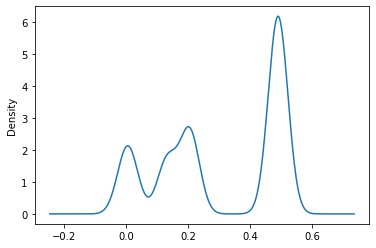

In [14]:
df["x46"].plot.density()

<AxesSubplot: ylabel='Density'>

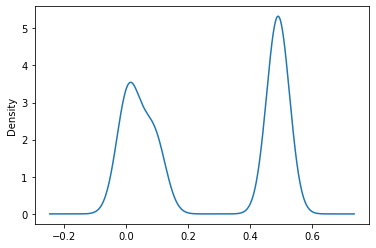

In [22]:
df["x47"].plot.density()

In [23]:
df["x46"].describe()

count    8981.000000
mean        0.300706
std         0.195179
min         0.000111
25%         0.132613
50%         0.205322
75%         0.489812
max         0.489812
Name: x46, dtype: float64

In [24]:
df["x47"].describe()

count    8981.000000
mean        0.260353
std         0.226710
min         0.000111
25%         0.017927
50%         0.097205
75%         0.489812
max         0.489812
Name: x47, dtype: float64